In [127]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle as pck

with open('DateData.pck', 'rb') as file:
    data = pck.load(file)
    
x, y = data[0][:,1], data[1]


# mean = 0; std = 1; variance = np.square(std)
# x = np.arange(-5,5,.05)
# y = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

N = len(x)


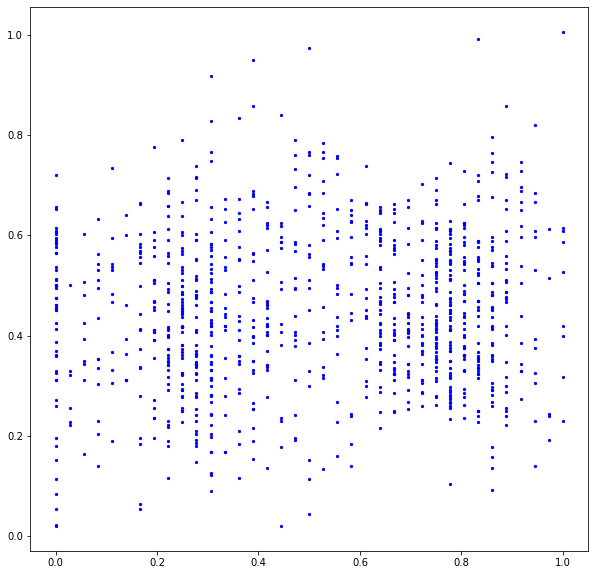

In [128]:
# N = 200
# x=np.random.rand(N)*10
# y = np.zeros(N)

# for i in range(N):
#     if x[i] < 2:
#         y[i] = 2*x[i]+1 + np.random.normal(0,0.1,1)
#     elif x[i] < 6:
#         y[i] = 2*x[i]+1 + np.random.normal(0,1,1)
#     else:
#         y[i] = -x[i]+20 + np.random.normal(0,0.1,1)

fig, axes = plt.subplots(1,1, figsize=(10,10))

axes.scatter(x,y, s=5, c='b', marker='o', label='data')


Text(0, 0.5, 'w2')

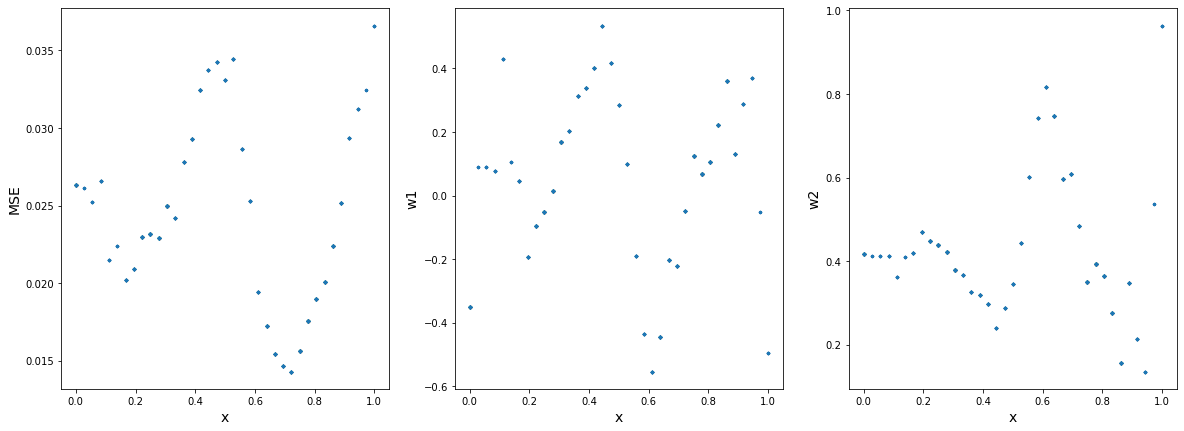

In [129]:
# Fit Local Linear Models
from itertools import compress
from sklearn.metrics import mean_squared_error
w1 = []
w2 = []
w = []
MSE = []

for i in range(N):
    xx = x[i]
    check = [np.sqrt((x[j]-xx)*(x[j]-xx))<0.1 for j in range(N)]                
    
    localxdata = list(compress(x, check))
    localydata = list(compress(y, check))
    X = np.array([localxdata, np.ones(len(localxdata))]).T
    wlocal = np.linalg.lstsq(X, localydata, rcond=1)[0]
    
    w1.append(wlocal[0])
    w2.append(wlocal[1])
    w.append(wlocal)
    MSE.append(mean_squared_error(localydata, np.dot(X, wlocal)))    

x = [x[i] for i in range(len(x))]
fig, axes = plt.subplots(1,3,figsize=(20,7))

fontsize=14

axes[0].scatter(x, MSE, s=5)
axes[0].set_xlabel('x', fontsize=fontsize)
axes[0].set_ylabel('MSE', fontsize=fontsize)

axes[1].scatter(x, w1, s=5)
axes[1].set_xlabel('x', fontsize=fontsize)
axes[1].set_ylabel('w1', fontsize=fontsize)

axes[2].scatter(x, w2, s=5)
axes[2].set_xlabel('x', fontsize=fontsize)
axes[2].set_ylabel('w2', fontsize=fontsize)

{'n_clusters': 4, 'metric': 'precomputed', 'metric_params': None, 'method': 'pam', 'init': 'random', 'max_iter': 300, 'random_state': 0, 'labels_': array([2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 3, 2, 0, 2, 3, 2, 0, 2, 2, 1, 0,
       2, 2, 2, 3, 1, 2, 2, 3, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 3, 2, 3, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 3, 0, 3, 2, 2, 3, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 3, 0, 0, 0, 0, 3, 2, 2, 0, 2, 3, 3, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 3, 2, 2, 0, 0, 3, 2, 3, 3, 2, 0, 0, 2, 2, 2, 2, 2, 3,
       3, 2, 0, 2, 3, 0, 2, 2, 3, 2, 2, 2, 0, 2, 3, 2, 0, 2, 2, 0, 2, 0,
       2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 0, 0, 1,
       0, 0, 3, 2, 2, 3, 2, 2, 3, 2, 3, 0, 3, 2, 0, 3, 3, 2, 2, 2, 1, 2,
       3, 3, 0, 3, 1, 2, 0, 3, 2, 0, 2, 2, 1, 0, 3, 2, 2, 0, 3, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 3, 0, 2, 3, 2, 0, 0, 0, 

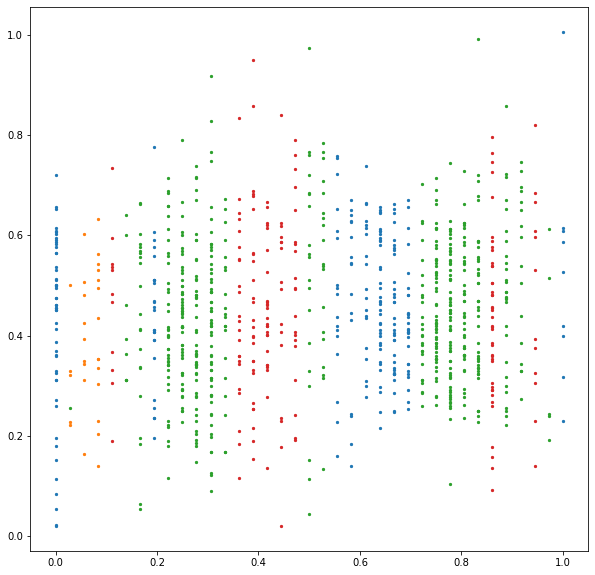

In [130]:
# Create Distance Matrix

D = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        distance = np.linalg.norm(w[i]-w[j]) + ((MSE[i]-MSE[j])) + (x[i]-x[j])
        D[i,j] = distance
        
import kmedoids
from sklearn_extra.cluster import KMedoids
K = 2
km = kmedoids.KMedoids(n_clusters=K, init='random', random_state=0, method='pam')
# c = kmedoids.fasterpam(D,K)
c=km.fit(D)
c.inertia_

print(vars(c))

fig, axes = plt.subplots(1,1,figsize=(10,10))
clusteredData = []
for k in np.unique(c.labels_):
    clustersx = []
    clustersy = []
    for i in range(len(c.labels_)):
        if c.labels_[i] == k:
            clustersx.append(x[i])
            clustersy.append(y[i])
    
    axes.scatter(clustersx, clustersy, s=5, marker='o', label='data')
    clusteredData.append([clustersx, clustersy])



(235, 1)
(235, 1)
[[0.06049523]] [0.42639433]
(28, 1)
(28, 1)
[[1.23457429]] [0.30637456]
(561, 1)
(561, 1)
[[0.06074986]] [0.41259876]
(176, 1)
(176, 1)
[[-0.01724575]] [0.46415926]


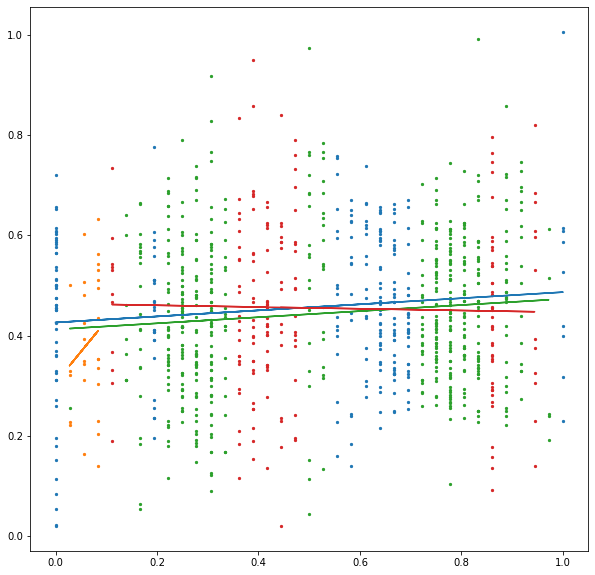

In [131]:
from sklearn.linear_model import LinearRegression

plt.show()

# Fit Linear Models From given clusters
def LR(x, y):
    x = np.array(x).reshape(-1,1)
    y = np.array(y)
    print(x.shape)
    print(y.shape)
    reg = LinearRegression().fit(x, y)
    return reg.coef_, reg.intercept_


fig, axes = plt.subplots(1,1,figsize=(10,10))
for i in clusteredData:
    w, b = LR(i[0], i[1])
    print(w,b)
    axes.scatter(i[0], i[1], s=5, marker='o', label='data')
    axes.plot(np.array(i[0]).flatten(), np.array([w*j+b for j in i[0]]).flatten())
